In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [4]:
# Build our DataFrame
df = pd.read_csv('troop_movements.csv')
df.dtypes


timestamp               object
unit_id                  int64
unit_type               object
empire_or_resistance    object
location_x               int64
location_y               int64
destination_x            int64
destination_y            int64
homeworld               object
dtype: object

In [3]:
#Data Grouped by counts of empire vs. resistance
empire_resistance_counts = df["empire_or_resistance"].value_counts().rename_axis("empire_or_resistance").reset_index(name="count")
print(empire_resistance_counts)

  empire_or_resistance  count
0           resistance    503
1               empire    497


In [4]:
#Counts of characters by homeworld
homeworlds = df['homeworld'].value_counts().rename_axis("homeworlds").reset_index(name="count")
print(homeworlds)

      homeworlds  count
0       Kashyyyk     31
1        Tholoth     30
2        Stewjon     29
3       Dathomir     29
4          Skako     29
5     Muunilinst     28
6         Eriadu     28
7          Zolan     27
8       Mon Cala     27
9       Corellia     27
10      Champala     27
11    Bestine IV     26
12         Dorin     26
13     Trandosha     25
14      Toydaria     25
15         Kalee     25
16          Tund     25
17        Mirial     24
18      Tatooine     24
19         Cerea     24
20       Vulpter     24
21       Troiken     24
22       Quermia     23
23      Iridonia     23
24       Sullust     22
25         Rodia     22
26   Glee Anselm     22
27       Serenno     22
28        Ryloth     21
29          Ojom     21
30     Malastare     21
31      Alderaan     21
32       Dagobah     21
33       Iktotch     21
34         Shili     21
35    Haruun Kal     20
36   Aleen Minor     20
37     Chandrila     20
38       Socorro     20
39        Umbara     20
40         Naboo

In [5]:
#Counts of characters by unit_type
unit_type = df['unit_type'].value_counts().rename_axis("unit_type").reset_index(name="count")
print(unit_type)

            unit_type  count
0  resistance_soldier    138
1         tie_fighter    128
2              x-wing    128
3        tie_silencer    124
4        stormtrooper    123
5             unknown    122
6               at-st    119
7               at-at    118


In [6]:
#Boolean based on empire or resitance

df["is_resistance"] = (df["empire_or_resistance"] == "resistance")
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2023-10-10 10:09:15,1,tie_fighter,resistance,2,1,2,2,Sullust,True
1,2023-10-10 10:09:14,2,tie_fighter,resistance,2,10,10,9,Bestine IV,True
2,2023-10-10 10:09:13,3,resistance_soldier,empire,2,7,9,2,Tund,False
3,2023-10-10 10:09:12,4,unknown,empire,2,9,2,8,Toydaria,False
4,2023-10-10 10:09:11,5,tie_silencer,empire,10,9,9,7,Iridonia,False
...,...,...,...,...,...,...,...,...,...,...
995,2023-10-10 09:52:40,996,resistance_soldier,empire,2,8,4,3,Socorro,False
996,2023-10-10 09:52:39,997,tie_silencer,empire,1,6,10,7,Champala,False
997,2023-10-10 09:52:38,998,unknown,empire,3,7,9,9,Dorin,False
998,2023-10-10 09:52:37,999,tie_fighter,resistance,7,1,2,3,Umbara,True


[Text(0.5, 1.0, 'Character Count by Empire or Resistance')]

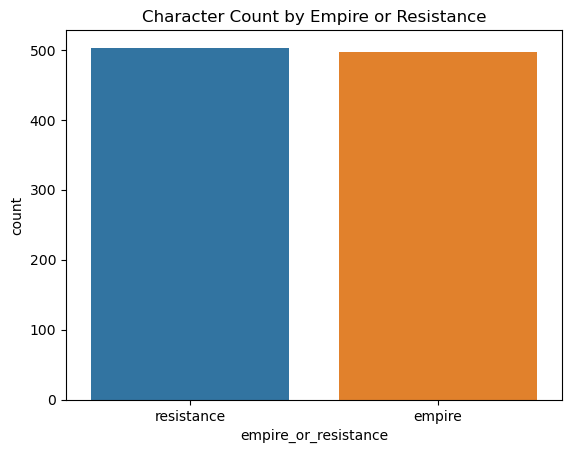

In [7]:
#Barplot of Empire vs Resistance
sns.barplot(empire_resistance_counts, x='empire_or_resistance', y='count').set(title="Character Count by Empire or Resistance")

In [5]:
# Prediction model of Empire vs Resistance based on homeworld and unit_type
X = df[['homeworld', 'unit_type']]
y = df['empire_or_resistance']

X_encoded = pd.get_dummies(X)
# X_encoded.head()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
print(feature_importances)

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


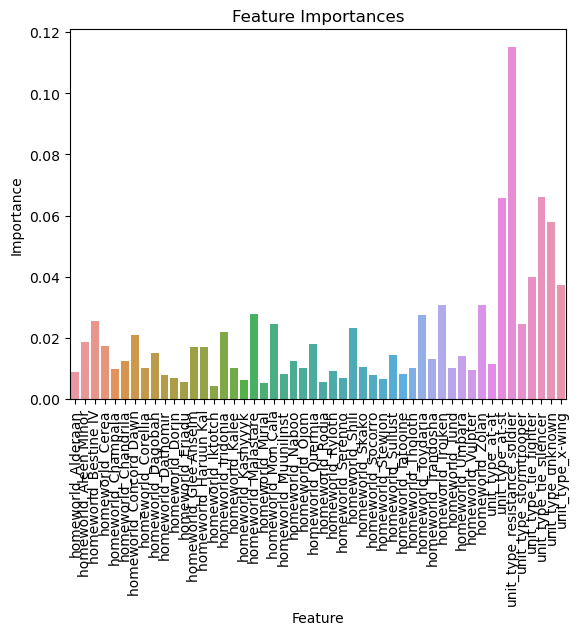

In [14]:
#Barplot of Empire vs Resistance Feature Importance
importance_plot = sns.barplot(feature_importances, x='Feature', y='Importance').set(title="Feature Importances")

# rotate labels
plt.xticks(rotation=90)
plt.show()

In [16]:
# Save model as pickle file
with open('trained_model.pkl', 'wb') as file: 
    # A new file will be created 
    pickle.dump(model, file) 